<a href="https://colab.research.google.com/github/amitoshacharya/Restaurant_Reviews_EDA/blob/main/NLP_Restaurant_Review_Prediction_(Good_or_Bad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
review_data= pd.read_csv(f'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Natural Language Processing/Restaurant Sentiment Analysis/Restaurant_Reviews.tsv',sep='\t')
review_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [172]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [173]:
#NLP Intialize
import spacy
import nltk

nlp=spacy.load(name='en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
len(nlp.Defaults.stop_words) #stopwords in spacy lib

326

In [175]:
from nltk.corpus import stopwords
len(stopwords.words('english')) #stopwords in nltk lib

179

In [176]:
eng_stopwords = list(set(list(nlp.Defaults.stop_words) + list(stopwords.words('english'))))
len(eng_stopwords)

382

In [177]:
import re
pattern = '[^a-zA-Z]'

In [178]:
## <<< testing functions >>>
review_data['Review'][0]
print(nlp(review_data['Review'][0]))
for token in nlp(review_data['Review'][0]):
  if token.text not in [eng_stopwords]:
    print(token.text)


Wow... Loved this place.
Wow
...
Loved
this
place
.


In [179]:
#creating doc_type object ---> nlp(x)
#Tokenization ---> nlp(x),
#lemmatization/stemming ---> view.lemma_.lower()
#Removing stop words---> view not in [eng_stopwords, string.punctuation]
#Removing punctuations---> re.sub(pattern,' ', ' '.join([<<code>>]))

review_data['Review']= review_data['Review'].apply(lambda x: re.sub(pattern,' ', ' '.join([view.lemma_.lower() for view in nlp(x) if view.text not in eng_stopwords])))
review_data.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,the selection menu great price,1


#***Algorithm- Bag of Words***

In [180]:
#Bag of Words Algorithm
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(review_data['Review'])

feature_names = vectorizer.get_feature_names_out()

x_df= pd.DataFrame(data=x.todense(), index=review_data.Review, columns=feature_names)
x_df.head()

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledge,...,yeah,year,yellow,yellowtail,yelper,yucky,yukon,yum,yummy,zero
Review,,,,,,,,,,,,,,,,,,,,,
wow love place,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
crust good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
not tasty texture nasty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stop late may bank holiday rick steve recommendation love,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the selection menu great price,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
x_df.shape

(1000, 1507)

In [182]:
y= review_data.Liked

In [183]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x_df, y, test_size=0.20, random_state=41)

In [184]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1507), (200, 1507), (800,), (200,))

In [185]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_mdl= GaussianNB()

nb_mdl.fit(x_train,y_train)

GaussianNB()

In [186]:
#prediction
nb_pred= nb_mdl.predict(x_test)

In [187]:
model_outputs= {}
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,mean_squared_error

model_outputs['GaussianNB'] ={'accuracy':accuracy_score(y_true=y_test, y_pred=nb_pred),
                              'f1_score':f1_score(y_true=y_test, y_pred=nb_pred),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=nb_pred)}

model_outputs

{'GaussianNB': {'accuracy': 0.73,
  'f1_score': 0.7567567567567568,
  'mean_squared_error': 0.27}}

In [188]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC(n_estimators=100, random_state=10, n_jobs=2)

In [189]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=10)

In [190]:
rfc_pred=rfc.predict(x_test)

In [191]:
model_outputs['RandomForestClassifier'] ={'accuracy':accuracy_score(y_true=y_test, y_pred=rfc_pred),
                              'f1_score':f1_score(y_true=y_test, y_pred=rfc_pred),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=rfc_pred)}

model_outputs

{'GaussianNB': {'accuracy': 0.73,
  'f1_score': 0.7567567567567568,
  'mean_squared_error': 0.27},
 'RandomForestClassifier': {'accuracy': 0.78,
  'f1_score': 0.7411764705882353,
  'mean_squared_error': 0.22}}

In [192]:
#Support Vector Machine
from sklearn.svm import SVC

svc=SVC(random_state=41)

In [193]:
svc.fit(x_train,y_train)

SVC(random_state=41)

In [194]:
svc_pred=svc.predict(x_test)

In [195]:
model_outputs['SVC'] ={'accuracy':accuracy_score(y_true=y_test, y_pred=svc_pred),
                              'f1_score':f1_score(y_true=y_test, y_pred=svc_pred),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=svc_pred)}

model_outputs

{'GaussianNB': {'accuracy': 0.73,
  'f1_score': 0.7567567567567568,
  'mean_squared_error': 0.27},
 'RandomForestClassifier': {'accuracy': 0.78,
  'f1_score': 0.7411764705882353,
  'mean_squared_error': 0.22},
 'SVC': {'accuracy': 0.83,
  'f1_score': 0.8152173913043478,
  'mean_squared_error': 0.17}}

In [196]:
from xgboost import XGBClassifier

xgb= XGBClassifier(n_estimators=100,n_jobs=2,random_state=41)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=2, num_parallel_tree=None,
              predictor=None, random_state=41, ...)

In [197]:
xgb_pred=xgb.predict(x_test)

In [198]:
model_outputs['XGB'] ={'accuracy':accuracy_score(y_true=y_test, y_pred=xgb_pred),
                              'f1_score':f1_score(y_true=y_test, y_pred=xgb_pred),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=xgb_pred)}

model_outputs

{'GaussianNB': {'accuracy': 0.73,
  'f1_score': 0.7567567567567568,
  'mean_squared_error': 0.27},
 'RandomForestClassifier': {'accuracy': 0.78,
  'f1_score': 0.7411764705882353,
  'mean_squared_error': 0.22},
 'SVC': {'accuracy': 0.83,
  'f1_score': 0.8152173913043478,
  'mean_squared_error': 0.17},
 'XGB': {'accuracy': 0.715,
  'f1_score': 0.6666666666666666,
  'mean_squared_error': 0.285}}

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=2)

In [200]:
knn_pred=xgb.predict(x_test)

In [201]:
model_outputs['knn'] ={'accuracy':accuracy_score(y_true=y_test, y_pred=knn_pred),
                              'f1_score':f1_score(y_true=y_test, y_pred=knn_pred),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=knn_pred)}

model_outputs

{'GaussianNB': {'accuracy': 0.73,
  'f1_score': 0.7567567567567568,
  'mean_squared_error': 0.27},
 'RandomForestClassifier': {'accuracy': 0.78,
  'f1_score': 0.7411764705882353,
  'mean_squared_error': 0.22},
 'SVC': {'accuracy': 0.83,
  'f1_score': 0.8152173913043478,
  'mean_squared_error': 0.17},
 'XGB': {'accuracy': 0.715,
  'f1_score': 0.6666666666666666,
  'mean_squared_error': 0.285},
 'knn': {'accuracy': 0.715,
  'f1_score': 0.6666666666666666,
  'mean_squared_error': 0.285}}

In [202]:
model_outputs.keys()

dict_keys(['GaussianNB', 'RandomForestClassifier', 'SVC', 'XGB', 'knn'])

In [203]:
model_df= pd.DataFrame(data=model_outputs,).T
model_df

,accuracy,f1_score,mean_squared_error
GaussianNB,0.730,0.756757,0.270
RandomForestClassifier,0.780,0.741176,0.220
SVC,0.830,0.815217,0.170
XGB,0.715,0.666667,0.285
knn,0.715,0.666667,0.285


In [204]:
x_axis=model_df.index

In [205]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_axis=scaler.fit_transform(model_df)
y_axis

array([[-0.53478782,  0.48357917,  0.53478782],
       [ 0.57935347,  0.20920513, -0.57935347],
       [ 1.69349477,  1.51309045, -1.69349477],
       [-0.86903021, -1.10293737,  0.86903021],
       [-0.86903021, -1.10293737,  0.86903021]])

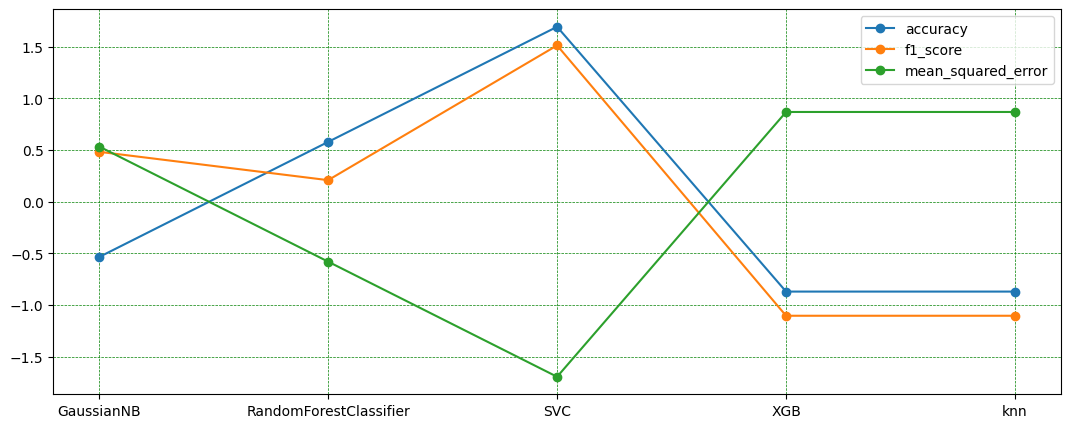

In [206]:
plt.figure(figsize=(13, 5))
plt.plot(x_axis,y_axis,marker='o')
plt.legend(model_df.columns)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

#***Model Selection***



1.   Accuracy for SVC is Higher as compare to others.
2.   F1-Score for SVC is Higher as compare to others.
3.   MSE for SVC is Lower as compare to others.

##**`Model Selected ====>>>> SVC`**



In [207]:
'''from IPython.display import display, clear_output

# Define the number of iterations
num_iterations = 1000

# Loop through the iterations
for i in range(num_iterations):

    # Update the iteration count
    clear_output(wait=True)
    display('Iteration {}/{}'.format(i+1, num_iterations))'''

"from IPython.display import display, clear_output\n\n# Define the number of iterations\nnum_iterations = 1000\n\n# Loop through the iterations\nfor i in range(num_iterations):\n\n    # Update the iteration count\n    clear_output(wait=True)\n    display('Iteration {}/{}'.format(i+1, num_iterations))"